In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

In [2]:
df = pd.read_csv("daily_food_nutrition_dataset.csv")

In [3]:
df.describe()

,User_ID,Calories,Protein,Carbohydrates,Fat,Fiber,Sugars,Sodium,Cholesterol,Water_Intake
count,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000
mean,498.706300,327.693900,25.523050,52.568550,25.43735,4.986940,25.052570,497.969000,151.886600,554.353600
std,289.123477,158.194716,14.131993,27.387152,14.14532,2.864984,14.480605,287.988001,87.360643,260.977642
min,1.000000,50.000000,1.000000,5.000000,1.00000,0.000000,0.000000,0.000000,0.000000,100.000000
25%,245.000000,190.000000,13.200000,28.800000,13.30000,2.500000,12.500000,249.750000,76.000000,327.000000
50%,492.000000,328.000000,25.500000,52.800000,25.30000,5.000000,25.000000,495.000000,153.000000,555.500000
75%,748.000000,464.000000,37.700000,76.400000,37.60000,7.500000,37.700000,749.000000,228.000000,783.000000
max,1000.000000,600.000000,50.000000,100.000000,50.00000,10.000000,50.000000,1000.000000,300.000000,1000.000000


In [4]:
# Select important features
df = df[["Food_Item", "Category", "Calories", "Protein", "Carbohydrates", "Fat", "Fiber", "Sugars", "Sodium", "Cholesterol"]]

In [5]:
df.head()

,Food_Item,Category,Calories,Protein,Carbohydrates,Fat,Fiber,Sugars,Sodium,Cholesterol
0,Eggs,Meat,173,42.4,83.7,1.5,1.5,12.7,752,125
1,Apple,Fruits,66,39.2,13.8,3.2,2.6,12.2,680,97
2,Chicken Breast,Meat,226,27.1,79.1,25.8,3.2,44.7,295,157
3,Banana,Fruits,116,43.4,47.1,16.1,6.5,44.1,307,13
4,Banana,Fruits,500,33.9,75.8,47.0,7.8,19.4,358,148


In [6]:
# count of null values in each feature
df.isnull().sum()

Food_Item        0
Category         0
Calories         0
Protein          0
Carbohydrates    0
Fat              0
Fiber            0
Sugars           0
Sodium           0
Cholesterol      0
dtype: int64

In [7]:
# Set a seed for consistent results
df = df.copy()
np.random.seed(42)

# Add random 0 or 1 for each example (row)
df["diabetes"] = np.random.randint(0, 2, size = len(df))
df["obesity"] = np.random.randint(0, 2, size = len(df))
df["bp"] = np.random.randint(0, 2, size = len(df))

# Show sample
df[["Food_Item", "Category", "Calories", "Protein", "Carbohydrates", "Fat", "Fiber", "Sugars", "Sodium", "Cholesterol", "diabetes", "bp", "obesity"]].head(10)

,Food_Item,Category,Calories,Protein,Carbohydrates,Fat,Fiber,Sugars,Sodium,Cholesterol,diabetes,bp,obesity
0,Eggs,Meat,173,42.4,83.7,1.5,1.5,12.7,752,125,0,0,0
1,Apple,Fruits,66,39.2,13.8,3.2,2.6,12.2,680,97,1,1,1
2,Chicken Breast,Meat,226,27.1,79.1,25.8,3.2,44.7,295,157,0,1,0
3,Banana,Fruits,116,43.4,47.1,16.1,6.5,44.1,307,13,0,1,1
4,Banana,Fruits,500,33.9,75.8,47.0,7.8,19.4,358,148,0,0,1
5,Oats,Grains,387,31.2,6.8,39.5,5.1,0.7,300,244,1,1,0
6,Carrot,Vegetables,138,28.2,12.4,20.2,2.8,37.8,933,15,0,1,1
7,Cookies,Snacks,69,36.8,17.8,15.0,9.6,36.4,185,228,0,0,1
8,Apple,Fruits,568,6.7,7.0,23.4,6.4,46.9,336,129,0,0,0
9,Quinoa,Grains,204,19.3,62.7,31.8,6.8,40.3,887,135,1,0,0


In [8]:
def is_healthy(row):
    """
    Health classification based on your dataset patterns
    Returns 1 for healthy, 0 for unhealthy
    """
    score = 100
    
    # Calorie penalties
    if row["Calories"] > 500:
        score -= 30
    elif row["Calories"] > 400:
        score -= 15
    
    # Fat penalties
    if row["Fat"] > 40:
        score -= 25
    elif row["Fat"] > 30:
        score -= 10
    
    # Sugar penalties
    if row["Sugars"] > 40:
        score -= 25
    elif row["Sugars"] > 25:
        score -= 10
    
    # Sodium penalties
    if row["Sodium"] > 800:
        score -= 20
    elif row["Sodium"] > 500:
        score -= 10
    
    # Cholesterol penalties
    if row["Cholesterol"] > 200:
        score -= 15
    elif row["Cholesterol"] > 150:
        score -= 5
    
    # Fiber bonus
    if row["Fiber"] > 7:
        score += 10
    elif row["Fiber"] > 4:
        score += 5
    
    # Protein bonus
    if row["Protein"] > 35:
        score += 10
    elif row["Protein"] > 25:
        score += 5
    
    # Health condition specific restrictions
    if row.get("diabetes", False) and row["Sugars"] > 15:
        score -= 20
    
    if row.get("bp", False) and row["Sodium"] > 300:
        score -= 20
    
    if row.get("obesity", False) and (row["Calories"] > 350 or row["Fat"] > 25):
        score -= 20
    
    # Category adjustments
    category = row.get("Category", "")
    if category == "Vegetables":
        score += 15
    elif category == "Fruits":
        score += 10
    elif category == "Snacks":
        score -= 10
    elif category == "Beverages" and row["Calories"] > 200:
        score -= 15
    
    # Return 1 if healthy (score >= 65), 0 if unhealthy
    return 1 if score >= 65 else 0

In [9]:
# Apply the healthy check on all examples
df = df.copy()
df["healthy"] = df.apply(is_healthy, axis = 1)

In [10]:
df

,Food_Item,Category,Calories,Protein,Carbohydrates,Fat,Fiber,Sugars,Sodium,Cholesterol,diabetes,obesity,bp,healthy
0,Eggs,Meat,173,42.4,83.7,1.5,1.5,12.7,752,125,0,0,0,1
1,Apple,Fruits,66,39.2,13.8,3.2,2.6,12.2,680,97,1,1,1,1
2,Chicken Breast,Meat,226,27.1,79.1,25.8,3.2,44.7,295,157,0,0,1,1
3,Banana,Fruits,116,43.4,47.1,16.1,6.5,44.1,307,13,0,1,1,1
4,Banana,Fruits,500,33.9,75.8,47.0,7.8,19.4,358,148,0,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,Salmon,Meat,346,29.8,55.6,4.6,1.7,0.5,976,87,1,0,1,1
9996,Grapes,Fruits,174,22.9,54.9,32.1,2.5,5.9,255,56,0,0,1,1
9997,Strawberry,Fruits,63,36.5,23.8,21.6,0.8,48.9,757,63,1,0,1,0
9998,Spinach,Vegetables,564,26.2,58.9,11.9,3.3,43.0,482,33,1,1,1,0


In [11]:
df.to_csv("processed_nutrition_data_with_disease.csv")

In [12]:
df["healthy"].value_counts()

healthy
0    6154
1    3846
Name: count, dtype: int64

# 1. Countplot of Healthy vs Unhealthy

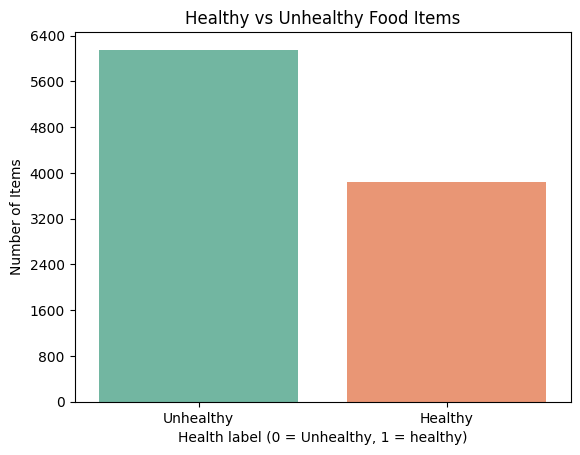

In [13]:
sns.countplot(x="healthy", hue="healthy", data=df, palette="Set2", legend=False)
plt.title("Healthy vs Unhealthy Food Items")
plt.xlabel("Health label (0 = Unhealthy, 1 = healthy)")
plt.ylabel("Number of Items")
plt.gca().yaxis.set_major_locator(plt.MaxNLocator(integer=True))
plt.xticks([0, 1], ['Unhealthy', 'Healthy'])
plt.show()

# Model Training

# 1. Define Features X  and Target y

In [14]:
# Feature columns (X) and Target (y)
X = df[["Calories", "Protein", "Carbohydrates", "Fat", "Fiber", "Sugars", "Sodium", "Cholesterol", "diabetes", "obesity", "bp"]]
y = df["healthy"]

# 2. Scaling the Features and Training the model 

In [15]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
X_scaled

array([[-0.97791911,  1.19429683,  1.13677417, ..., -0.99740337,
        -0.99860098, -1.00742758],
       [-1.65433456,  0.96784893, -1.41564515, ...,  1.00260339,
         1.00140098,  0.99262718],
       [-0.6428722 ,  0.11159282,  0.9688038 , ..., -0.99740337,
        -0.99860098,  0.99262718],
       ...,
       [-1.67329948,  0.77678351, -1.05049217, ...,  1.00260339,
        -0.99860098,  0.99262718],
       [ 1.49384203,  0.04790435,  0.23119478, ...,  1.00260339,
         1.00140098,  0.99262718],
       [ 0.72260198, -0.32714999, -0.92268863, ..., -0.99740337,
        -0.99860098, -1.00742758]])

# 3. Splitting the dataset into train and test samples

In [16]:
#split dataset
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size = 0.2, random_state = 42)

# 4. Model Training using Logistic Regression

In [17]:
model = LogisticRegression()
model.fit(X_train, y_train)

,penalty,'l2'
,dual,False
,tol,0.0001
,C,1.0
,fit_intercept,True
,intercept_scaling,1
,class_weight,None
,random_state,None
,solver,'lbfgs'
,max_iter,100
,multi_class,'deprecated'


# 5. Model Evaluation and Prediction

In [18]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

y_pred_train = model.predict(X_train)

#Accuracy test
print("Accuracy: ",accuracy_score(y_train, y_pred_train))
print("Classification Report: \n", classification_report(y_train, y_pred_train))
print("Confusion Matrix: \n", confusion_matrix(y_train, y_pred_train))


Accuracy:  0.840875
Classification Report: 
               precision    recall  f1-score   support

           0       0.86      0.89      0.87      4950
           1       0.81      0.77      0.79      3050

    accuracy                           0.84      8000
   macro avg       0.83      0.83      0.83      8000
weighted avg       0.84      0.84      0.84      8000

Confusion Matrix: 
 [[4389  561]
 [ 712 2338]]


In [19]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

y_pred = model.predict(X_test)

#Accuracy test
print("Accuracy: ",accuracy_score(y_test, y_pred))
print("Classification Report: \n", classification_report(y_test, y_pred))
print("Confusion Matrix: \n", confusion_matrix(y_test, y_pred))



Accuracy:  0.8415
Classification Report: 
               precision    recall  f1-score   support

           0       0.87      0.87      0.87      1204
           1       0.80      0.80      0.80       796

    accuracy                           0.84      2000
   macro avg       0.83      0.83      0.83      2000
weighted avg       0.84      0.84      0.84      2000

Confusion Matrix: 
 [[1045  159]
 [ 158  638]]


Confusion Matrix:
[[1045  159]
 [ 158  638]]


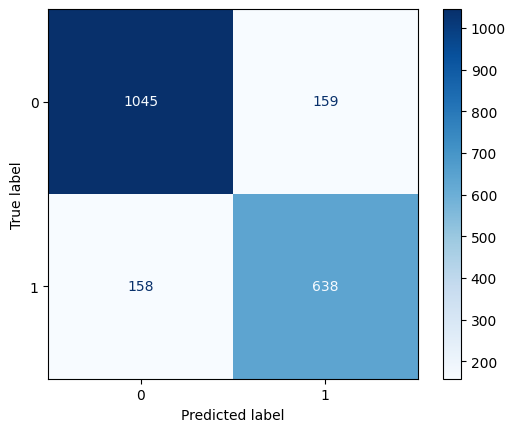

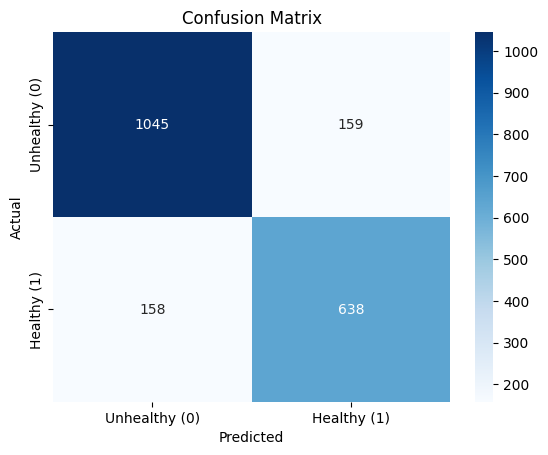

In [20]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt
import seaborn as sns

# Get predictions
y_pred = model.predict(X_test)

# Compute confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Option 1: Simple text output
print("Confusion Matrix:")
print(cm)

# Option 2: Pretty plot using ConfusionMatrixDisplay
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=model.classes_)
disp.plot(cmap=plt.cm.Blues)
plt.show()

# Option 3: Heatmap with Seaborn
sns.heatmap(cm, annot=True, fmt='d', cmap="Blues", xticklabels=["Unhealthy (0)", "Healthy (1)"], yticklabels=["Unhealthy (0)", "Healthy (1)"])
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()


# 6. Testing on random sample 

In [21]:

# Generate 1 random test sample
random_sample = pd.DataFrame({
    "Calories": [np.random.randint(50, 800)],
    "Protein": [round(np.random.uniform(0, 50), 1)],
    "Carbohydrates": [round(np.random.uniform(0, 100), 1)],
    "Fat": [round(np.random.uniform(0, 70), 1)],
    "Fiber": [round(np.random.uniform(0, 30), 1)],
    "Sugars": [round(np.random.uniform(0, 50), 1)],
    "Sodium": [np.random.randint(0, 2500)],
    "Cholesterol": [np.random.randint(0, 300)],
    "diabetes": [np.random.randint(0, 2)],
    "obesity": [np.random.randint(0, 2)],
    "bp": [np.random.randint(0, 2)]
})

print("Random Test Sample:\n", random_sample)


Random Test Sample:
    Calories  Protein  Carbohydrates  Fat  Fiber  Sugars  Sodium  Cholesterol  \
0       327     37.3           56.3  5.8    5.6    11.0    1090          210   

   diabetes  obesity  bp  
0         1        0   0  


In [22]:
random_sample

,Calories,Protein,Carbohydrates,Fat,Fiber,Sugars,Sodium,Cholesterol,diabetes,obesity,bp
0,327,37.3,56.3,5.8,5.6,11.0,1090,210,1,0,0


In [23]:
random_sample["healthy"] = random_sample.apply(is_healthy, axis = 1)

In [24]:
random_sample

,Calories,Protein,Carbohydrates,Fat,Fiber,Sugars,Sodium,Cholesterol,diabetes,obesity,bp,healthy
0,327,37.3,56.3,5.8,5.6,11.0,1090,210,1,0,0,1


In [25]:
X_test_sample = random_sample[["Calories", "Protein", "Carbohydrates", "Fat", "Fiber", "Sugars", "Sodium", "Cholesterol", "diabetes", "obesity", "bp"]]
y_test_sample = random_sample[["healthy"]]

In [26]:
X_sample_scaled = scaler.transform(X_test_sample) # for 1 sample
X_sample_scaled

array([[-0.00438659,  0.83339549,  0.13625501, -1.38832718,  0.21399443,
        -0.97048931,  2.05585164,  0.66524586,  1.00260339, -0.99860098,
        -1.00742758]])

In [27]:
y_pred_test = model.predict(X_sample_scaled)

In [28]:
y_pred_test[0]

np.int64(1)

In [29]:
y_test_sample["healthy"][0] 

np.int64(1)

In [30]:
import pandas as pd

sample = pd.DataFrame([{
    "Calories": 501,
    "Protein": 0,
    "Carbohydrates": 150.0,
    "Fat": 50,
    "Fiber": 0,
    "Sugars": 100,
    "Sodium": 600,
    "Cholesterol": 100,
    "diabetes": 1,
    "obesity": 1,
    "bp": 1,
    "Category": "Vegetables"
}])

# Add the label
sample["healthy"] = sample.apply(is_healthy, axis=1)
print(sample)


   Calories  Protein  Carbohydrates  Fat  Fiber  Sugars  Sodium  Cholesterol  \
0       501        0          150.0   50      0     100     600          100   

   diabetes  obesity  bp    Category  healthy  
0         1        1   1  Vegetables        0  


In [31]:
import pandas as pd

sample = pd.DataFrame([{
  "Calories": 501,
  "Protein": 0,
  "Carbohydrates": 150,
  "Fat": 50,
  "Fiber": 0,
  "Sugars": 100,
  "Sodium": 600,
  "Cholesterol": 100,
  "bp": 1,
  "diabetes": 1,
  "obesity": 1
}])

# Add the label
sample["healthy"] = sample.apply(is_healthy, axis=1)
print(sample)


   Calories  Protein  Carbohydrates  Fat  Fiber  Sugars  Sodium  Cholesterol  \
0       501        0            150   50      0     100     600          100   

   bp  diabetes  obesity  healthy  
0   1         1        1        0  


In [32]:
X_test_sample_0 = sample[["Calories", "Protein", "Carbohydrates", "Fat", "Fiber", "Sugars", "Sodium", "Cholesterol", "diabetes", "obesity", "bp"]]
y_test_sample_0 = sample[["healthy"]]

In [61]:
X_test_sample_0
# y_test_sample_0

,Calories,Protein,Carbohydrates,Fat,Fiber,Sugars,Sodium,Cholesterol,diabetes,obesity,bp
0,501,0,150,50,0,100,600,100,1,1,1


In [62]:
X_test_sample_0_scaled = scaler.transform(X_test_sample_0)
X_test_sample_0_scaled

array([[ 1.09557873, -1.80613782,  3.55773841,  1.7365375 , -1.7407389 ,
         5.1759699 ,  0.35430678, -0.59396535,  1.00260339,  1.00140098,
         0.99262718]])

In [65]:
y_pred_test_1 = model.predict(X_test_sample_0_scaled)
print(model.predict_proba(X_test_sample_0_scaled))
print("Predicted: ", y_pred_test_1)
print("Actual: ", y_test_sample_0["healthy"][0])

[[9.99999778e-01 2.21651574e-07]]
Predicted:  [0]
Actual:  0


In [69]:
print(list(X.columns))

['Calories', 'Protein', 'Carbohydrates', 'Fat', 'Fiber', 'Sugars', 'Sodium', 'Cholesterol', 'diabetes', 'obesity', 'bp']


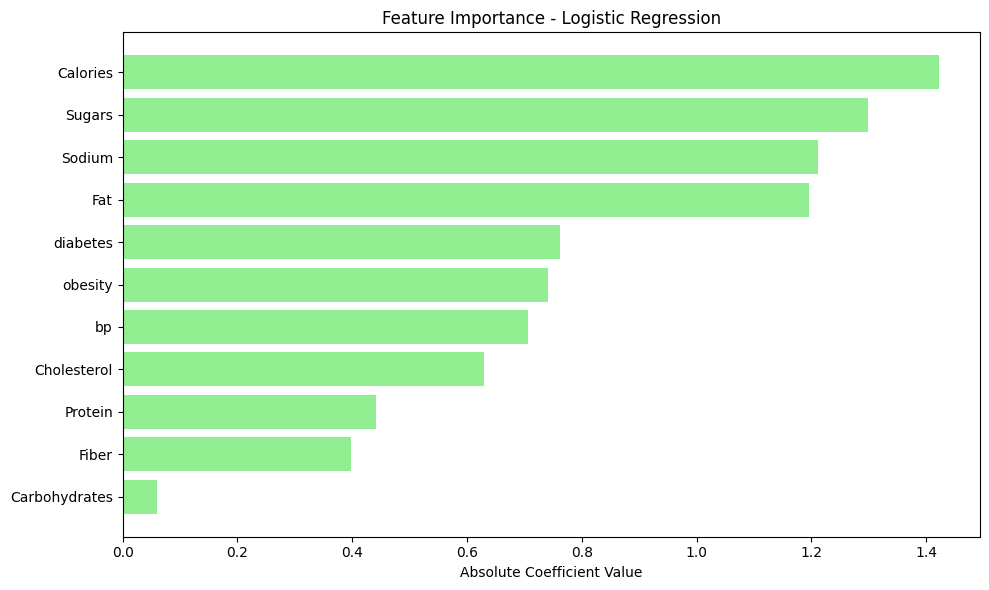

In [36]:
# Get coefficients from the model (1D array for binary classification)
coefficients = model.coef_[0]

# Match coefficients with feature names
feature_names = X.columns  # same columns you trained on
importance_df = pd.DataFrame({
    'Feature': feature_names,
    'Coefficient': coefficients,
    'Absolute Importance': np.abs(coefficients)
}).sort_values(by='Absolute Importance', ascending=True)

# Plot
plt.figure(figsize=(10, 6))
plt.barh(importance_df['Feature'], importance_df['Absolute Importance'], color='lightgreen')
plt.xlabel("Absolute Coefficient Value")
plt.title("Feature Importance - Logistic Regression")
plt.tight_layout()
plt.show()


In [37]:
print(pd.DataFrame({'Feature': X.columns, 'Coefficient': model.coef_[0]}))


          Feature  Coefficient
0        Calories    -1.422596
1         Protein     0.442066
2   Carbohydrates    -0.059812
3             Fat    -1.196616
4           Fiber     0.397358
5          Sugars    -1.297850
6          Sodium    -1.211060
7     Cholesterol    -0.630193
8        diabetes    -0.762864
9         obesity    -0.741339
10             bp    -0.705456


In [38]:
from sklearn.metrics import roc_auc_score, roc_curve, auc
y_pred_proba = model.predict_proba(X_test)[:, 1]  # probabilities for class 1
# Calculate ROC AUC
roc_auc = roc_auc_score(y_test, y_pred_proba)

In [39]:
roc_auc

0.9215189318686455

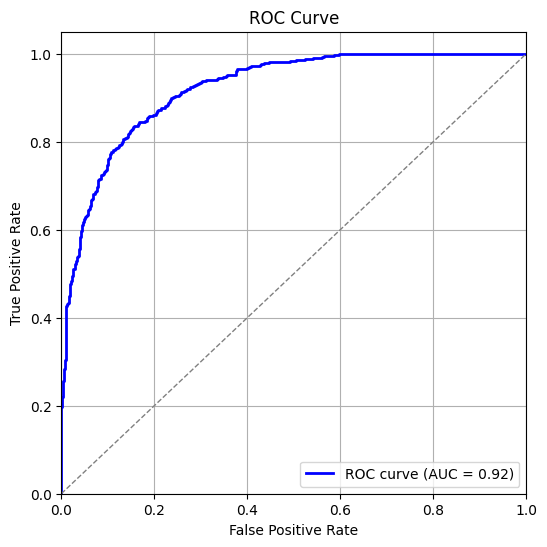

In [40]:
# Compute ROC curve points
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)
roc_auc_value = auc(fpr, tpr)

# Plot
plt.figure(figsize=(6, 6))
plt.plot(fpr, tpr, color='blue', lw=2, label=f'ROC curve (AUC = {roc_auc_value:.2f})')
plt.plot([0, 1], [0, 1], color='gray', lw=1, linestyle='--')  # Random guess line
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc="lower right")
plt.grid(True)
plt.show()

# Training new models

In [43]:
#imports
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from xgboost import XGBClassifier

In [44]:
models = {
    "Logistic Regression": LogisticRegression(max_iter = 1000, random_state=42),
    "Decision Tree": DecisionTreeClassifier(random_state=42),
    "Random Forest": RandomForestClassifier(n_estimators=100, random_state=42),
    "AdaBoost": AdaBoostClassifier(n_estimators=100, random_state=42),
    "XGBoost": XGBClassifier(
        n_estimators=100, learning_rate=0.1, max_depth=4, 
        random_state=42, use_label_encoder=False, eval_matrix='logloss'
    )
}

results = {}

In [45]:
train_results = {}

In [47]:
#training, evaluation and predictions
for name, clf in models.items():
    clf.fit(X_train, y_train)

    #predictions
    y_new_pred_train = clf.predict(X_train)
    y_new_pred_test = clf.predict(X_test)

    # metrics
    acc_train = accuracy_score(y_train, y_new_pred_train)
    acc_test = accuracy_score(y_test, y_new_pred_test)
    train_report = classification_report(y_train, y_new_pred_train, output_dict=True)
    report = classification_report(y_test, y_new_pred_test, output_dict=True)

    train_results[name] = {
        "Train Accuracy": acc_train,
        "Precision (Unhealthy)": train_report['0']['precision'],
        "Recall (Unhealthy)": train_report['0']['recall'],
        "Precision (Healthy)": train_report['1']['precision'],
        "Recall (Healthy)": train_report['1']['recall']
    }
    results[name] = {
        "Train Accuracy": acc_train,
        "Test Accuracy": acc_test,
        "Precision (Unhealthy)": report['0']['precision'],
        "Recall (Unhealthy)": report['0']['recall'],
        "Precision (Healthy)": report['1']['precision'],
        "Recall (Healthy)": report['1']['recall']
    }

#display results
df_train_results = pd.DataFrame(train_results).T
df_test_results = pd.DataFrame(results).T
print("-----------------Test on Train data Results------------------------")
print(df_train_results)
print("-----------------Test on test data Results------------------------")
print(df_test_results)

-----------------Test on Train data Results------------------------
                     Train Accuracy  Precision (Unhealthy)  \
Logistic Regression        0.840875               0.860420   
Decision Tree              1.000000               1.000000   
Random Forest              1.000000               1.000000   
AdaBoost                   0.879750               0.891749   
XGBoost                    0.935625               0.941294   

                     Recall (Unhealthy)  Precision (Healthy)  Recall (Healthy)  
Logistic Regression            0.886667             0.806485          0.766557  
Decision Tree                  1.000000             1.000000          1.000000  
Random Forest                  1.000000             1.000000          1.000000  
AdaBoost                       0.916970             0.858763          0.819344  
XGBoost                        0.955556             0.926050          0.903279  
-----------------Test on test data Results------------------------
      

D:\PYTHON_PROJECT\Lib\site-packages\xgboost\training.py:183: UserWarning: [05:34:03] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "eval_matrix", "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


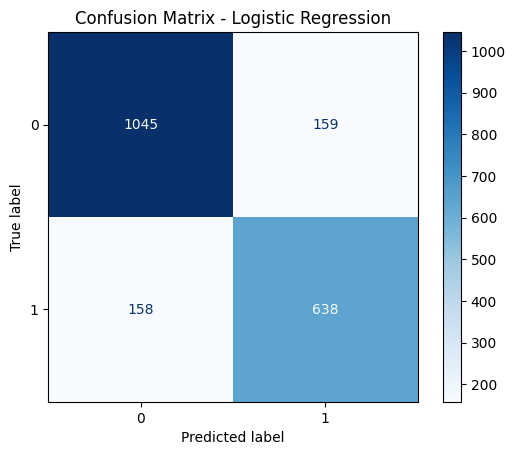

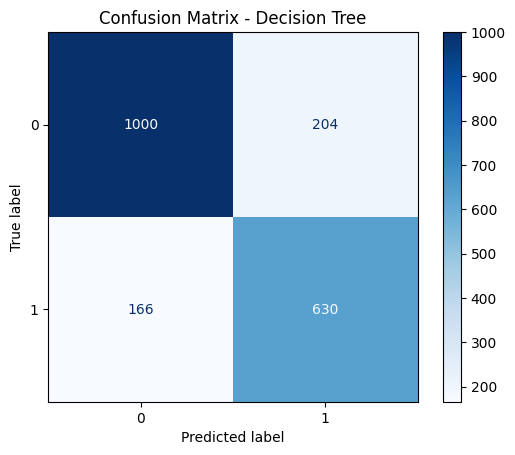

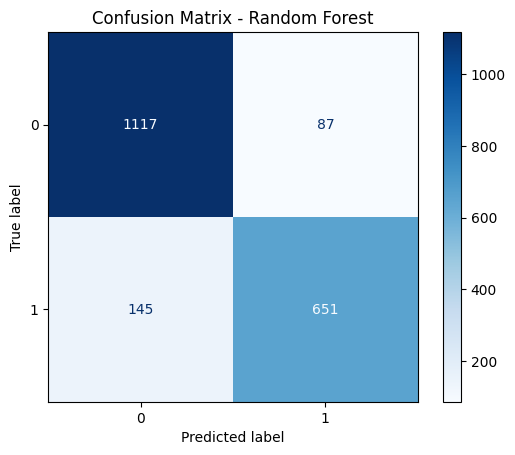

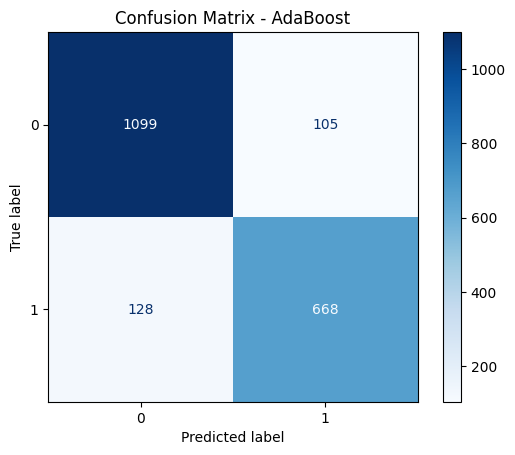

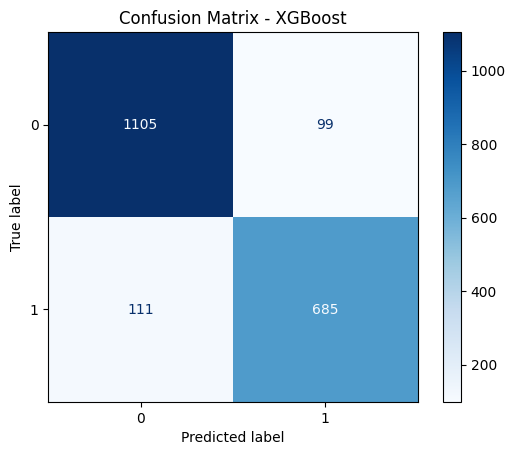

In [48]:
from sklearn.metrics import ConfusionMatrixDisplay
import matplotlib.pyplot as plt

for name, clf in models.items():
    y_pred_temp = clf.predict(X_test)
    ConfusionMatrixDisplay.from_estimator(clf, X_test, y_test, cmap='Blues')
    plt.title(f"Confusion Matrix - {name}")
    plt.show()


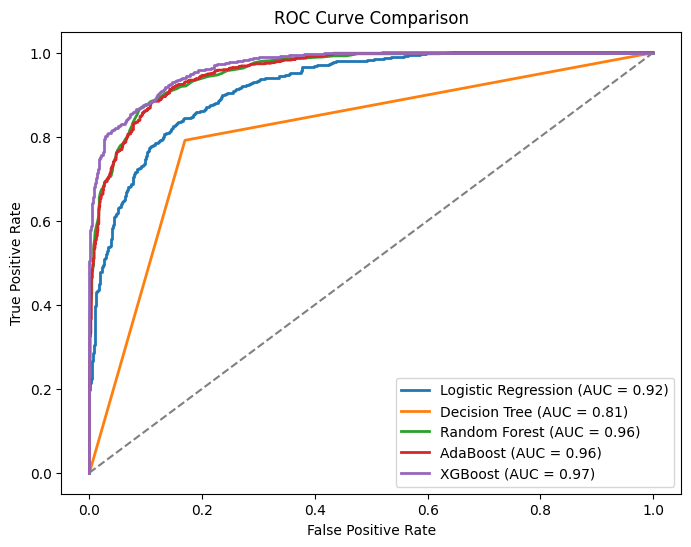

In [49]:
from sklearn.metrics import roc_curve, auc

plt.figure(figsize=(8,6))
for name, clf in models.items():
    if hasattr(clf, "predict_proba"):
        y_score = clf.predict_proba(X_test)[:,1]
    else:
        y_score = clf.decision_function(X_test)
    fpr, tpr, _ = roc_curve(y_test, y_score)
    roc_auc = auc(fpr, tpr)
    plt.plot(fpr, tpr, lw=2, label=f'{name} (AUC = {roc_auc:.2f})')

plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve Comparison')
plt.legend()
plt.show()


In [53]:
FEATURES = [
    "Calories", "Protein", "Carbohydrates", "Fat", "Fiber",
    "Sugars", "Sodium", "Cholesterol", "diabetes", "obesity", "bp"
]

In [54]:
# Get feature importance values
importance = models["XGBoost"].feature_importances_

# Combine with feature names
feature_imp_df = pd.DataFrame({
    'Feature': FEATURES,
    'Importance': np.round(importance, 4)
}).sort_values(by='Importance', ascending=False)

print(feature_imp_df)


          Feature  Importance
8        diabetes      0.1522
0        Calories      0.1298
3             Fat      0.1283
10             bp      0.1149
9         obesity      0.1129
5          Sugars      0.1066
6          Sodium      0.1007
7     Cholesterol      0.0707
4           Fiber      0.0389
1         Protein      0.0326
2   Carbohydrates      0.0124


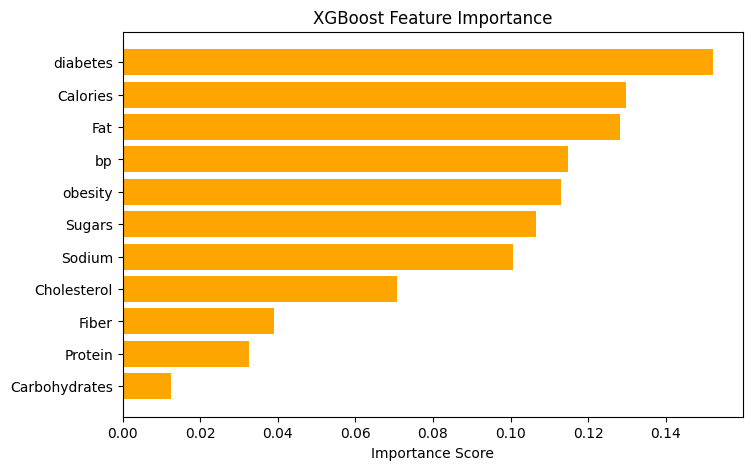

In [55]:
# Plot
plt.figure(figsize=(8, 5))
plt.barh(feature_imp_df['Feature'], feature_imp_df['Importance'], color='orange')
plt.xlabel("Importance Score")
plt.title("XGBoost Feature Importance")
plt.gca().invert_yaxis()
plt.show()

In [57]:
# !pip install shap

   ---------------------------------------- 0.0/548.0 kB ? eta -:--:--
   ------------------- -------------------- 262.1/548.0 kB ? eta -:--:--
   ---------------------------------------- 548.0/548.0 kB 2.3 MB/s eta 0:00:00
   ---------------------------------------- 0.0/2.7 MB ? eta -:--:--
   ------- -------------------------------- 0.5/2.7 MB 2.8 MB/s eta 0:00:01
   --------------- ------------------------ 1.0/2.7 MB 2.8 MB/s eta 0:00:01
   ---------------------- ----------------- 1.6/2.7 MB 2.8 MB/s eta 0:00:01
   ------------------------------ --------- 2.1/2.7 MB 2.7 MB/s eta 0:00:01
   ---------------------------------------- 2.7/2.7 MB 2.7 MB/s eta 0:00:00
   ---------------------------------------- 0.0/38.1 MB ? eta -:--:--
    --------------------------------------- 0.5/38.1 MB 3.4 MB/s eta 0:00:12
   - -------------------------------------- 1.0/38.1 MB 2.8 MB/s eta 0:00:14
   - -------------------------------------- 1.6/38.1 MB 2.8 MB/s eta 0:00:14
   -- --------------------


[notice] A new release of pip is available: 25.1.1 -> 25.3
[notice] To update, run: python.exe -m pip install --upgrade pip


C:\Users\shant\AppData\Local\Temp\ipykernel_13476\2978609391.py:8: FutureWarning: The NumPy global RNG was seeded by calling `np.random.seed`. In a future version this function will no longer use the global RNG. Pass `rng` explicitly to opt-in to the new behaviour and silence this warning.
  shap.summary_plot(shap_values, X_test, feature_names=FEATURES)


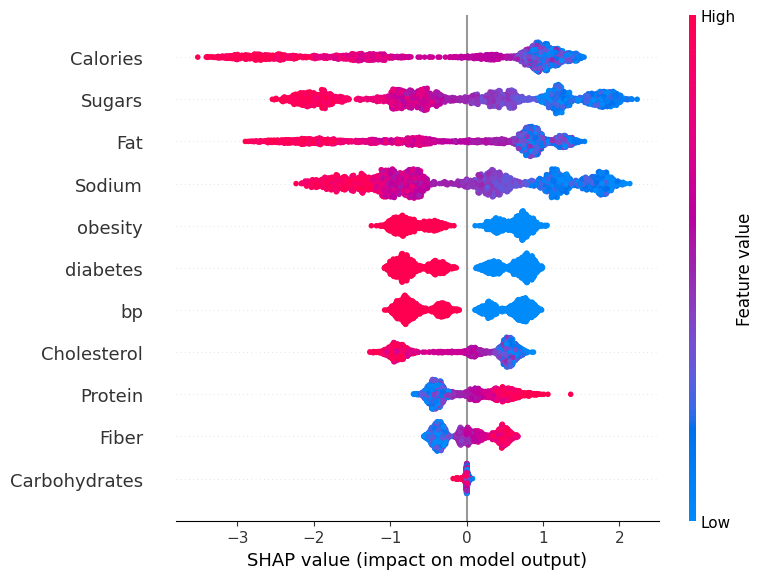

In [58]:
import shap

# Initialize SHAP explainer
explainer = shap.Explainer(models["XGBoost"])
shap_values = explainer(X_test)

# Summary plot
shap.summary_plot(shap_values, X_test, feature_names=FEATURES)

In [59]:
import joblib
joblib.dump(models["XGBoost"], "Model PKL/best_food_health_classifier_xgb.pkl")
joblib.dump(scaler, "feature_scaler.pkl")

['feature_scaler.pkl']